In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=24bf2ea519074b43acc7911b97371eb85b12857592576e2f99262718947bcc8b
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 42.0 MB/s eta 0:00:00


In [2]:
import numpy as np
from scipy.linalg import expm
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz

In [3]:
# Function to apply QFT
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from heapq import nlargest
from qiskit import transpile
from qiskit_aer import AerSimulator
from math import pi, sqrt
from qiskit.quantum_info import DensityMatrix as dm
from qiskit import QuantumCircuit as qc
from qiskit import QuantumRegister as qr

In [4]:
from qiskit.quantum_info import Statevector, Operator

Unitary of H Z H:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Unitary of X:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Are they equal up to global phase?  True

H Z H circuit:


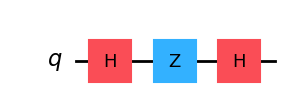

X circuit:


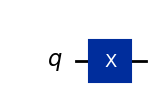

In [5]:
# --- Build the H Z H circuit ---
circuit_hzh = QuantumCircuit(1)
circuit_hzh.h(0)
circuit_hzh.z(0)
circuit_hzh.h(0)

# --- Build the X circuit ---
circuit_x = QuantumCircuit(1)
circuit_x.x(0)

# --- Compute unitaries ---
U_hzh = Operator(circuit_hzh)
U_x = Operator(circuit_x)

print("Unitary of H Z H:")
print(U_hzh.data)

print("\nUnitary of X:")
print(U_x.data)

# Check equality up to global phase
print("\nAre they equal up to global phase? ", U_hzh.equiv(U_x))

# --- Draw circuits ---
print("\nH Z H circuit:")
display(circuit_hzh.draw("mpl"))

print("X circuit:")
display(circuit_x.draw("mpl"))


Unitary of H Z H:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Unitary of X:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Are they equal up to global phase? True

H Z H circuit:


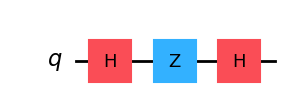

X circuit:


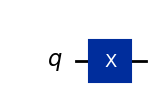

Unitary of H Z H:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Unitary of X:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Are they equal up to global phase? True

H Z H circuit:


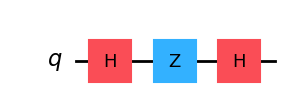

X circuit:


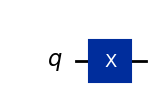

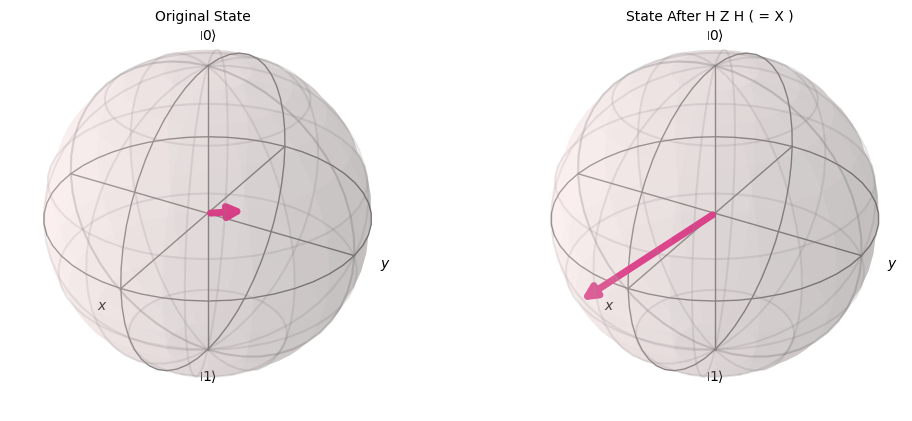

Original Bloch coords: [np.float64(0.6123724356957945), np.float64(0.6123724356957945), np.float64(0.5000000000000002)]
After HZH: [np.float64(0.6123724356957942), np.float64(-0.6123724356957941), np.float64(-0.49999999999999983)]
After X: [np.float64(0.6123724356957945), np.float64(-0.6123724356957945), np.float64(-0.5000000000000002)]
Original Bloch coords: [np.float64(0.6123724356957945), np.float64(0.6123724356957945), np.float64(0.5000000000000002)]
After HZH: [np.float64(0.6123724356957942), np.float64(-0.6123724356957941), np.float64(-0.49999999999999983)]
After X: [np.float64(0.6123724356957945), np.float64(-0.6123724356957945), np.float64(-0.5000000000000002)]


In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Define circuits
# -------------------------------------------------------------
circuit_hzh = QuantumCircuit(1)
circuit_hzh.h(0)
circuit_hzh.z(0)
circuit_hzh.h(0)

circuit_x = QuantumCircuit(1)
circuit_x.x(0)

U_hzh = Operator(circuit_hzh)
U_x   = Operator(circuit_x)

print("Unitary of H Z H:\n", U_hzh.data)
print("\nUnitary of X:\n", U_x.data)
print("\nAre they equal up to global phase?", U_hzh.equiv(U_x))

print("\nH Z H circuit:")
display(circuit_hzh.draw("mpl"))

print("X circuit:")
display(circuit_x.draw("mpl"))

# -------------------------------------------------------------
# 2. Function to generate arbitrary qubit states on Bloch sphere
# -------------------------------------------------------------
def arbitrary_state(theta, phi):
    """ Return an arbitrary single-qubit pure state """
    return Statevector([
        np.cos(theta/2),
        np.exp(1j * phi) * np.sin(theta/2)
    ])

# Example angles for arbitrary state
theta = np.pi / 3     # 60 degrees
phi   = np.pi / 4     # 45 degrees

psi = arbitrary_state(theta, phi)

# -------------------------------------------------------------
# 3. Compute transformed states
# -------------------------------------------------------------
psi_HZH = psi.evolve(U_hzh)
psi_X   = psi.evolve(U_x)

# -------------------------------------------------------------
# 4. Helper: convert Statevector → Bloch coordinates
# -------------------------------------------------------------
def bloch_coords(state):
    """Return Bloch sphere coordinates (x, y, z)."""
    rho = state.to_operator().data
    x = np.real(np.trace(rho @ np.array([[0,1],[1,0]])))
    y = np.real(np.trace(rho @ np.array([[0,-1j],[1j,0]])))
    z = np.real(np.trace(rho @ np.array([[1,0],[0,-1]])))
    return [x, y, z]

# Original and transformed Bloch vectors
vec_psi     = bloch_coords(psi)
vec_psi_HZH = bloch_coords(psi_HZH)
vec_psi_X   = bloch_coords(psi_X)

# -------------------------------------------------------------
# 5. Plot Bloch sphere trajectories
# -------------------------------------------------------------
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Define circuits
# -------------------------------------------------------------
circuit_hzh = QuantumCircuit(1)
circuit_hzh.h(0)
circuit_hzh.z(0)
circuit_hzh.h(0)

circuit_x = QuantumCircuit(1)
circuit_x.x(0)

U_hzh = Operator(circuit_hzh)
U_x   = Operator(circuit_x)

print("Unitary of H Z H:\n", U_hzh.data)
print("\nUnitary of X:\n", U_x.data)
print("\nAre they equal up to global phase?", U_hzh.equiv(U_x))

print("\nH Z H circuit:")
display(circuit_hzh.draw("mpl"))

print("X circuit:")
display(circuit_x.draw("mpl"))

# -------------------------------------------------------------
# 2. Function to generate arbitrary qubit states on Bloch sphere
# -------------------------------------------------------------
def arbitrary_state(theta, phi):
    """ Return an arbitrary single-qubit pure state """
    return Statevector([
        np.cos(theta/2),
        np.exp(1j * phi) * np.sin(theta/2)
    ])

# Example angles for arbitrary state
theta = np.pi / 3     # 60 degrees
phi   = np.pi / 4     # 45 degrees

psi = arbitrary_state(theta, phi)

# -------------------------------------------------------------
# 3. Compute transformed states
# -------------------------------------------------------------
psi_HZH = psi.evolve(U_hzh)
psi_X   = psi.evolve(U_x)

# -------------------------------------------------------------
# 4. Helper: convert Statevector → Bloch coordinates
# -------------------------------------------------------------
def bloch_coords(state):
    """Return Bloch sphere coordinates (x, y, z)."""
    rho = state.to_operator().data
    x = np.real(np.trace(rho @ np.array([[0,1],[1,0]])))
    y = np.real(np.trace(rho @ np.array([[0,-1j],[1j,0]])))
    z = np.real(np.trace(rho @ np.array([[1,0],[0,-1]])))
    return [x, y, z]

# Original and transformed Bloch vectors
vec_psi     = bloch_coords(psi)
vec_psi_HZH = bloch_coords(psi_HZH)
vec_psi_X   = bloch_coords(psi_X)

# -------------------------------------------------------------
# 5. Plot Bloch sphere trajectories
# -------------------------------------------------------------
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
plot_bloch_vector(vec_psi, ax=ax1, title="Original State")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plot_bloch_vector(vec_psi_HZH, ax=ax2, title="State After H Z H ( = X )")

plt.show()

print("Original Bloch coords:", vec_psi)
print("After HZH:", vec_psi_HZH)
print("After X:", vec_psi_X)


plt.show()

print("Original Bloch coords:", vec_psi)
print("After HZH:", vec_psi_HZH)
print("After X:", vec_psi_X)


Unitary of 3-CNOT construction:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

Unitary of SWAP:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

Are they equal up to global phase?  True

3-CNOT Constructed SWAP:


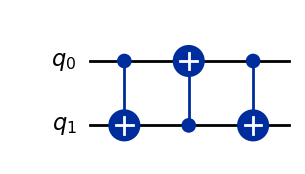

Actual SWAP gate circuit:


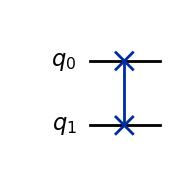

In [7]:
# --- 3-CNOT SWAP construction ---
c3 = QuantumCircuit(2)
c3.cx(0, 1)  # CNOT (control 0 → target 1)
c3.cx(1, 0)  # CNOT (control 1 → target 0)
c3.cx(0, 1)  # CNOT (control 0 → target 1)

# --- SWAP gate circuit ---
swap_circ = QuantumCircuit(2)
swap_circ.swap(0, 1)

# --- Compute unitaries ---
U_3cnot = Operator(c3)
U_swap = Operator(swap_circ)

print("Unitary of 3-CNOT construction:")
print(U_3cnot.data)

print("\nUnitary of SWAP:")
print(U_swap.data)

# Test equality (up to global phase)
print("\nAre they equal up to global phase? ", U_3cnot.equiv(U_swap))

# --- Draw circuits ---
print("\n3-CNOT Constructed SWAP:")
display(c3.draw("mpl"))

print("Actual SWAP gate circuit:")
display(swap_circ.draw("mpl"))


Original Toffoli unitary:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

Decomposed Toffoli unitary:
[[1.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 1.11022302e-16+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 1.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 1.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+

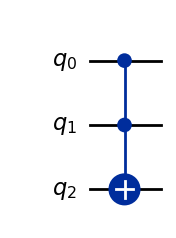

Decomposed Toffoli circuit:


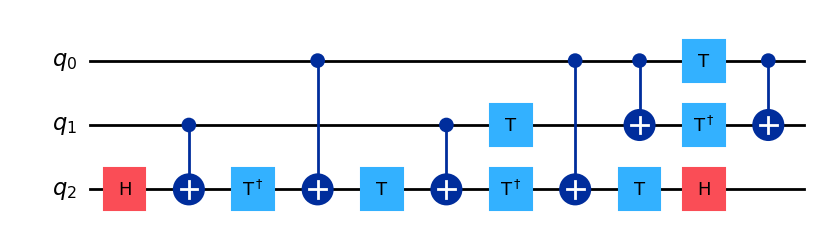

In [8]:
# --- Original Toffoli gate (CCX) ---
toffoli = QuantumCircuit(3)
toffoli.ccx(0, 1, 2)

# --- Decomposed Toffoli circuit ---
# Standard decomposition uses H, T, T†, and several CNOTs
decomp = QuantumCircuit(3)

decomp.h(2)
decomp.cx(1, 2)
decomp.tdg(2)
decomp.cx(0, 2)
decomp.t(2)
decomp.cx(1, 2)
decomp.tdg(2)
decomp.cx(0, 2)
decomp.t(1)
decomp.t(2)
decomp.h(2)
decomp.cx(0, 1)
decomp.t(0)
decomp.tdg(1)
decomp.cx(0, 1)

# --- Compute unitaries ---
U_orig = Operator(toffoli)
U_decomp = Operator(decomp)

print("Original Toffoli unitary:")
print(U_orig.data)

print("\nDecomposed Toffoli unitary:")
print(U_decomp.data)

# Check equivalence up to global phase
print("\nAre they equal up to global phase? ", U_orig.equiv(U_decomp))

# --- Draw circuits ---
print("\nOriginal Toffoli gate:")
display(toffoli.draw("mpl"))

print("Decomposed Toffoli circuit:")
display(decomp.draw("mpl"))



CASE: CNOT  Z1  CNOT

Unitary equivalence: True

CNOT – Pauli – CNOT:


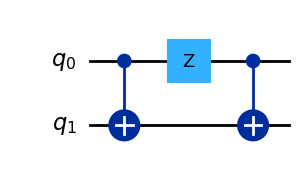

Resulting gate circuit:


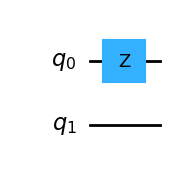


CASE: CNOT  Z2  CNOT

Unitary equivalence: True

CNOT – Pauli – CNOT:


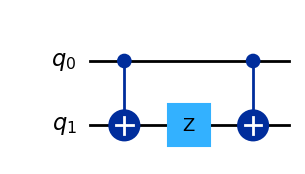

Resulting gate circuit:


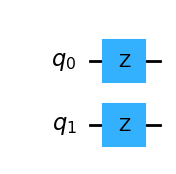


CASE: CNOT  X1  CNOT

Unitary equivalence: True

CNOT – Pauli – CNOT:


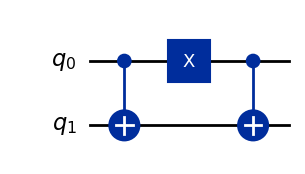

Resulting gate circuit:


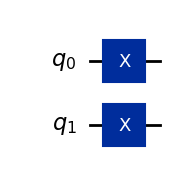


CASE: CNOT  X2  CNOT

Unitary equivalence: True

CNOT – Pauli – CNOT:


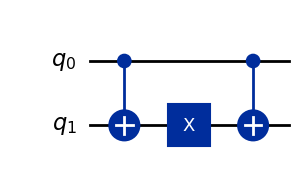

Resulting gate circuit:


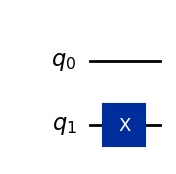

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from IPython.display import display

# ---------------------------------------------------------------------
# Mapping from each case to the known resulting operator
# ---------------------------------------------------------------------
def resulting_gate(pauli, qubit):
    qc = QuantumCircuit(2)
    if pauli == "z" and qubit == 0:
        qc.z(0)                      # Result: Z1
    elif pauli == "z" and qubit == 1:
        qc.z(0); qc.z(1)             # Result: Z1 Z2
    elif pauli == "x" and qubit == 0:
        qc.x(0); qc.x(1)             # Result: X1 X2
    elif pauli == "x" and qubit == 1:
        qc.x(1)                      # Result: X2
    return qc

# ---------------------------------------------------------------------
# Build CNOT ∘ P ∘ CNOT
# ---------------------------------------------------------------------
def conjugated(pauli, qubit):
    qc = QuantumCircuit(2)
    qc.cx(0,1)
    getattr(qc, pauli)(qubit)
    qc.cx(0,1)
    return qc

# ---------------------------------------------------------------------
# Display one case (original, resulting, and comparison)
# ---------------------------------------------------------------------
def show_case(label, pauli, qubit):
    print("\n===============================================")
    print(f"CASE: {label}")
    print("===============================================\n")

    conj = conjugated(pauli, qubit)
    res  = resulting_gate(pauli, qubit)

    U1 = Operator(conj)
    U2 = Operator(res)

    print("Unitary equivalence:", U1.equiv(U2))

    print("\nCNOT – Pauli – CNOT:")
    display(conj.draw("mpl"))

    print("Resulting gate circuit:")
    display(res.draw("mpl"))


# ---------------------------------------------------------------------
# Four required cases
# ---------------------------------------------------------------------
show_case("CNOT  Z1  CNOT", "z", 0)
show_case("CNOT  Z2  CNOT", "z", 1)
show_case("CNOT  X1  CNOT", "x", 0)
show_case("CNOT  X2  CNOT", "x", 1)
